In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.naive_bayes import *
from sklearn.metrics import *

In [37]:
data = pd.read_csv('./heart1.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [38]:
data2 = pd.read_csv('./haberman.csv')
data2.head()

,Age,Year,Number of +ve axilliary nodes,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [39]:
for_prediction = [54, 0, 0, 126, 204, 0, 1, 163, 1, 2.7, 1, 3, 2]

In [40]:
xVar = data.drop(columns='target', axis=1)
yVar = data['target'].values.reshape(-1,1)
xTrain, xTest, yTrain, yTest = train_test_split(xVar, yVar, test_size=0.3)

In [41]:
catnb = CategoricalNB()
gausnb = GaussianNB()
catnb.fit(xTrain,yTrain)
gausnb.fit(xTrain,yTrain)

/home/sal/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sal/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [42]:
print(np.unique(data['target'], return_counts=True))

(array([0, 1]), array([499, 526]))


In [43]:
predictions = catnb.predict(xTest)
print('Confusion matrix for categorical naive bayes')
print(confusion_matrix(yTest, predictions))

Confusion matrix for categorical naive bayes
[[129  26]
 [ 12 141]]


In [44]:
predictions_gnb = gausnb.predict(xTest)
print('Confusion matrix for gaussian naive bayes')
print(confusion_matrix(yTest,predictions_gnb))

Confusion matrix for gaussian naive bayes
[[121  34]
 [ 25 128]]


In [45]:
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       155
           1       0.84      0.92      0.88       153

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308



/home/sal/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


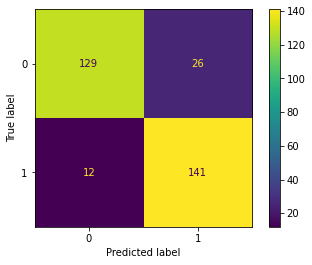

In [46]:
plot_confusion_matrix(catnb, xTest, yTest)

In [47]:
print(recall_score(yTest, predictions))

0.9215686274509803


In [48]:
print(precision_score(yTest, predictions))

0.844311377245509


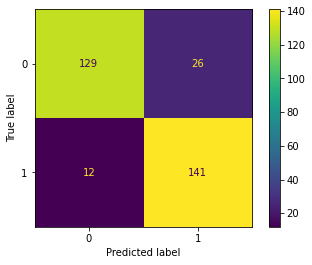

In [49]:
ConfusionMatrixDisplay.from_predictions(yTest, predictions)

In [50]:
print(f1_score(yTest, predictions))

0.88125


In [51]:
matthews_corrcoef(yTest, predictions)

0.7565110636025354

In [52]:
roc_auc_score(yTest, predictions)

0.8769133459835546

In [56]:
fr_prediction = [for_prediction]

In [57]:
catnb.predict(fr_prediction)

/home/sal/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([0])

/home/sal/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


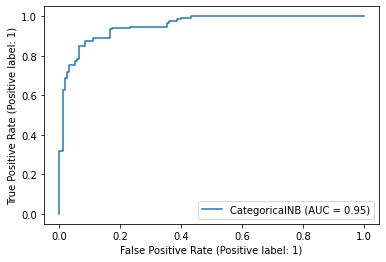

In [58]:
plot_roc_curve(catnb, xTest, yTest)

In [65]:
fpr, tpr, _ = roc_curve(yTest, predictions)

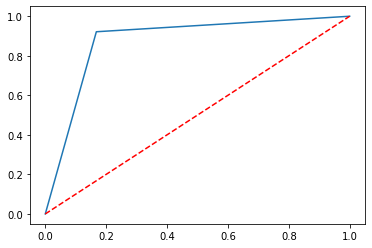

In [67]:
y_true  = []
for i in yTest:
    if i == 0:
        y_true.append(0)
    else:
        y_true.append(1)
fpr, tpr, _ = roc_curve(y_true,predictions)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'r--')
plt.show()

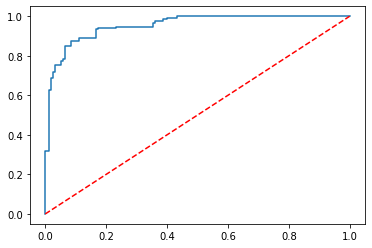

In [72]:
proba = catnb.predict_proba(xTest)[:,1]
fpr,tpr, _ = roc_curve(y_true, proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.show()